![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Resolvendo sistemas especiais

## Questão 1: Algoritmo

Uma matriz é dita tridiagonal quando só possui entradas diferentes de zero na diagonal,
e imediatamente acima ou abaixo dela.

Explique porque, ao fazer a eliminação, o algoritmo só precisa operar nas três "diagonais centrais".

O Processo de Eliminação faz parte do algoritmo de resolução de sistemas lineares computacionalmente. A resolução completa envolve o Processo de Eliminação e o Processo de Substituição. 

No Processo de Eliminação, estaremos substituindo cada linha, de cima para baixo, a partir da segunda, por uma que seja a combinação linear da linha atual e da linha anterior, de forma que o elemento pivô da linha seja igual a zero - e faz-se isso recursivamente até que todos os elementos que sejam da mesma coluna do pivô sejam iguais a zero. Portanto, __se ele já for zero__, não é necessário fazer nenhuma operação. Assim, no processo de eliminação, precisamos apenas trabalhar com as diagonais centrais __porque elas não são iguais a zero__, enquanto todas as outras diagonais já são.

Esse argumento é igualmente válido para o Processo de Substituição, que permite a resolução completa do sistema de equações lineares. Uma vez já feito o Processo de Eliminação, o Processo de Substituição irá substituir as linhas que possuem elementos que não sejam iguais a zero, mas no sentido contrário do processo de eliminação, focando nas diagonais superiores. Portanto, __se as linhas já tiverem o seu elemento relacionado ao pivô zerado, não há operação a fazer__.

Assim, não apenas o Processo de Eliminação, mas também o de Substituição, precisam trabalhar apenas nas diagonais centrais, porque todas as outras já estão iguais a zero. No final dos dois processos, teremos apenas uma matriz diagonal, originária da matriz dada inicialmente, precisando zerar apenas as diagonais que já não estão zeradas.

Dê um exemplo de uma matriz $4 \times 4$, com muitos zeros, mas para a qual o algoritmo de eliminação
vai ter que acessar e calcular nas entradas correspondentes a estes zeros.

$$
M = \begin{bmatrix} 
    0 & 1 & 0 & 1 \\
    1 & 0 & 4 & 0 \\
    0 & 3 & 0 & 27 \\
    1 & 0 & 16 & 0 
    \end{bmatrix}
$$

Ou: 

$$
M = \begin{bmatrix}
    1 & 1 & 1 & 1 \\
    1 & 0 & 0 & 4 \\
    3 & 0 & 0 & 81 \\
    1 & 4 & 16 & 64 \\
    \end{bmatrix}
$$

Ambas são matrizes inversíveis, montadas com uma distribuição de zeros desagradável para o algoritmo de eliminação. apesar de a segunda ter possibilidades de otimização melhores que a primeira.

Agora, escreva a função `tridiag_solve` para resolver sistemas tridiagonais, ou seja,
aqueles cuja matriz de coeficientes é tridiagonal.

Esta função deve realizar o algoritmo de eliminação,
mas, para ter uma boa performance, opere apenas nas entradas das diagonais centrais.

In [100]:
def tridiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float64))
    b = np.copy(np.asarray(b, dtype=np.float64))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    
    # Eliminação - passa pelas colunas, começando pela primeira:
    for column in range(m-1):
        pivot = A[column][column]
        # Passa pelas linhas aqui, para eliminar cada coluna
        for line in range(column+1, column+2):
            if A[line][column] != 0:
                factor = A[line][column] / pivot
                # Passa pelas colunas da linha, aqui, para ajustar os valores:
                A[line][column] = 0
                A[line][column+1] = A[line][column+1] - A[column][column+1] * factor
                # Calcula o novo valor dos elementos para todas as colunas da linha A:
                b[line] = b[line] - b[column] * factor
             
    # Substituição: passa pelas colunas, começando pela última:
    for column in range(m-1, 0, -1):
        pivot = A[column][column]
        if A[column-1][column] != 0:
            factor = A[column-1][column] / pivot
            A[column-1][column] = 0
            b[column-1] = b[column-1] - b[column] * factor
           
    # Retorna o resultado:
    return np.array([b[column]/A[column][column] for column in range(n)])

Qual o papel do primeiro assert?

O papel do primeiro assert é garantir que o número de elementos da matriz __b__, com os valores a que o sistema linear representado por __A__ é igualado, tenha o mesmo número de elementos do que a quantidade de linhas que __A__ possui - ou seja, __b__ possui a mesma quantidade de valores que __A__ possui em variáveis a serem encontradas.

In [101]:
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

x1 = np.linalg.solve(A,b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-14, rtol=1e-14)

In [102]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-13, rtol=1e-13)

Se você não tivesse acesso a `np.linalg.solve`, como você poderia testar sua função?
Explique abaixo, e dê um exemplo de teste na caixa seguinte.

A gente sabe que `np.linalg.solve` resolve o seguinte sistema:

* $A_{n \times n} \Rightarrow$ Matriz dos coeficientes do sistema linear
* $x_n \Rightarrow$ Matrix das variáveis a serem identificadas no sistema linear
* $b_n \Rightarrow$ Matriz com os resultados das igualdades das equações do sistema linear 

$ A_{n \times n} x_n = b_n $,

Então sabemos que:

$ A_{n \times n}^{-1} A_{n \times n} x_n = A_{n \times n}^{-1} b_n \Leftrightarrow x_n = A_{n \times n}^{-1} b_n $,

O que significa que basta ter acesso à rotina que inverte matrizes para verificar se a função `tridiag_solve` foi corretamente implementada.

O teste pode ser visto abaixo.


In [106]:
# Exemplo de teste
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

A_1 = np.linalg.inv(A)

x1 = A_1 @ b
x2 = tridiag_solve(A, b)

assert np.allclose(x1, x2, atol=1e-8,  rtol=1e-8)

In [107]:
np.random.seed(9)
A = np.random.randn(5,5)
b = [1,2,3,4,5]


x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert not np.allclose(x1, x2, atol=1e-3, rtol=1e-3)

Explique o resultado dos testes acima.

Existem dois testes acima - um implementado para verificar se a se a função `tridiag_solve` está corretamente implementada, utilizando a inversão da matriz __A__ para fazer a verificação. Esse teste já está explicado anteriormente, mostrando a relação entre a resolução do sistema linear e a inversão da matriz de coeficientes.

Entretanto, o segundo teste, que foi aplicando a `tridiag_solve` sobre uma matriz com coeficientes randômicos apenas mostrou que o uso dessa função sobre sistemas representados por matrizes que não são tridiagonais chega a resultados falhos - porque a `tridiag_solve` é uma função específica, para um tipo específico de matrizes, não podendo ser aplicada para matrizes quaisquer. A `tridia_solve` deve ser aplicada apenas sobre matrizes tridiagonais.

## Questão 2: Tempos

Para cada um dos `ns` dados a seguir, monte um sistema tridiagonal $n \times n$,
e calcule o tempo (usando `time`) para:
1. Criar a matriz A e o vetor b (podem ser aleatórios, podem não ser)
2. Resolver o sistema usando `tridiag_solve`

Armazene os tempos em duas listas, `t_create` e `t_solve`.

Obs: a caixa abaixo pode usar algo como 500M de RAM, por conta das matrizes 4k
(ou até mais, dependendo de **como** você criar as matrizes).
Assim, para testar, diminua a amplitude do logspace, terminando em $2^{10}$ em vez de $2^{12}$.
Se você não conseguir fazer funcionar até $2^{12}$,
reduza o maior valor do `logspace`, mas não reduza demais.

Obs2: A caixa abaixo deve ser executada em menos de 60 segundos, para não dar `TimeOut`.

In [210]:
import random as r
import time as t

In [219]:
%%time

# Adicionado valor inicial ao ns (2^3), porque o primeiro loop de avaliação 
# de tempo está com erro de captura (dando valor muito maior que os próximos).
# Então o primeiro valor de ns é ignorado nos gráficos futuros.
ns = np.append([2**3], np.logspace(4, 13, base=2, num=28, dtype=int))
t_create = []
t_solve = []

for i, n in enumerate(ns):
    starting = t.time()
    # Matriz [A] calculada com valores aleatórios, mas nunca muito pequenos, 
    # nem muito grandes, para evitar erros numéricos acumulados:
    A = [[(r.random()*1.90 + 0.1)*r.choices([-1,1])[0] if (abs(j-i)<=1) else 0 for j in range(n)] for i in range(n)]
    # Matriz [b] calculada com valores aleatórios, mas nunca muito pequenos, 
    # nem muito grandes, para evitar erros numéricos acumulados:
    b = [(r.random()*1.90 + 0.1)*r.choices([-1,1])[0] for i in range(n)]
    ending = t.time()
    t_create.append(ending-starting)
    
    starting = t.time()
    x = tridiag_solve(A, b)
    ending = t.time()
    t_solve.append(ending-starting)

# Removendo primeiro valor das listas de tempo mensurados:
ns = ns[1:]
t_create = t_create[1:]
t_solve = t_solve[1:]

CPU times: user 17 s, sys: 283 ms, total: 17.3 s
Wall time: 17.3 s


Agora, faça um gráfico destes tempos, em função de $n$.

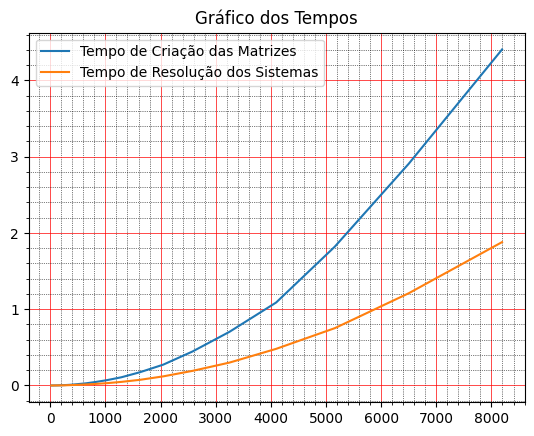

In [220]:
fig, ax = plt.subplots()

plt.plot(ns, t_create, label="Tempo de Criação das Matrizes")
plt.plot(ns, t_solve, label="Tempo de Resolução dos Sistemas")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Gráfico dos Tempos")
plt.legend()

ax = plt.gca()

In [221]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

In [222]:
for l in ax.lines:
    xs = l.get_xdata()
    assert min(xs) == 2**4
    assert 2**9 <= max(xs) <= 2**13

In [223]:
ax = None

Qual etapa demora mais?
Porquê você acha que isso acontece?

A etapa de criação das matrizes demora mais, porque ela utiliza algumas funções de geração de números randomicos(`random.random` e `random.choices`), que são iteradas para os possíveis valores de todas as matrizes a serem testadas, mas ainda iterando e atribuindo o valor $0$ para os valores das matrizes que estão fora das três diagonais centrais - ou seja, no limite a criação das matrizes tem mais iterações do que as soluções.

Agora, faça novos gráficos, para tentar descobrir a taxa de crescimento destes tempos:
se é linear, quadrático, exponencial, ... em função de $n$.

E se são a mesma taxa ou não!

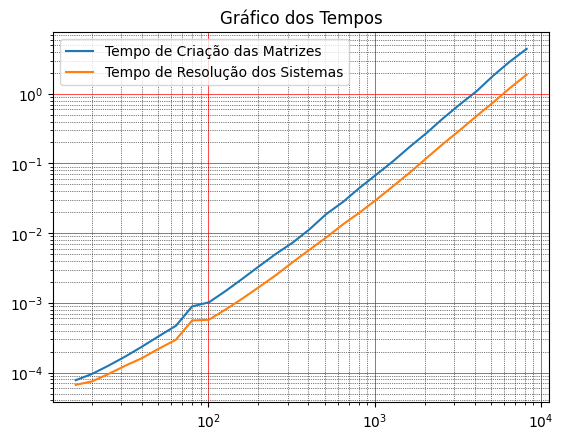

In [224]:
fig, ax = plt.subplots()

plt.loglog(ns, t_create, label="Tempo de Criação das Matrizes")
plt.loglog(ns, t_solve, label="Tempo de Resolução dos Sistemas")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Gráfico dos Tempos")
plt.legend()

Comente

Uma excelente forma de se encontrar se uma relação entre variáveis é exponencial e pegar os dados e plotar em escala bilinear - porque se, nessa escala, temos uma reta, ou uma quase reta, temos relações exponenciais entre variáveis.

Nos gráficos acima, percebemos que, tanto para a criação das matrizes quanto para a resolução dos sistemas lineares, temos quase-retas no gráfico de escala bilinear. Entretanto, a inclinação da reta para a criação das matrizes parece ser levemente mais inclinada, para cima, do que a reta para a resolução dos sistemas - indicando que o consumo de tempo para a criação das matrizes parece crescer mais rápido, exponencialmente, do que para a resolução dos sistemas, que também cresce exponencialmente.

Outra característica perceptível é que ambos os gráficos parecem ter uma leve concavidade para cima - mostrando que a relação não é perfeitamente exponencial, mas alguma coisa próxima da exponencial, mas crescendo ainda mais rápido.


## Questão 3: Sistemas pentadiagonais

Agora, suponha que a matriz $A$ é pentadiagonal, ou seja, as entradas não-nulas
podem estar até 2 linhas acima ou abaixo da diagonal principal.
Generalize o seu programa para resolver sistemas pentadiagonais.

In [ ]:
def pentadiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float64))
    b = np.copy(np.asarray(b, dtype=np.float64))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x2 = tridiag_solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x3, x2, atol=1e-13, rtol=1e-13)

In [ ]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,-2,-2], k=2) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

In [ ]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,0,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

Repita os cálculos de tempo, para resolver sistemas de dimensão até $2^{12}$.

In [ ]:
ns = np.logspace(4,12, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
for i, n in enumerate(ns):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

O que mudou?

YOUR ANSWER HERE

## Questão 4: Velocidade

Seu método tridiagonal é mais rápido do que `np.linalg.solve` para matrizes $10 \times 10$?
Para qual $n$, aproximadamente, seu método fica mais rápido?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

E como é a qualidade da solução?
Faça cálculos na caixa abaixo, e comente em seguida.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE